## Flow pass a cylinder

### created by Yuying Liu, 06/09/2020

This script is used to do sequence generation on a simulation of flow pass a cylinder, which  can be used to reproduce a row in Figure 7.

In [1]:
# imports
import os
import sys
import torch
import numpy as np
import scipy as sp
from tqdm.notebook import tqdm
from scipy.io import loadmat
from scipy.linalg import svd
from matplotlib import animation
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

module_path = os.path.abspath(os.path.join('../../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# # # # # # # # # # # # # # # # # #
#  global constants, paths, etc.  #
# # # # # # # # # # # # # # # # # #
data_dir = '../../data/Fluid/'
result_dir = '../../results/Fluid/'

## Part I

### process data

In [3]:
obj = loadmat(os.path.join(data_dir, 'CYLINDER_ALL.mat'))
raw_data = obj['UALL']
data = obj['UALL'].reshape(449, 199, -1)

In [4]:
# animation of raw_data
def plot_images(img_list):
    def init():
        img.set_data(img_list[0].T)
        return (img,)
    def animate(i):
        img.set_data(img_list[i].T)
        return (img,)

    fig = plt.figure(figsize=(15, 6))
    plt.axis('off')
    ax = fig.gca()
    img = ax.imshow(img_list[0].T, cmap='hot')
    plt.close();
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(img_list), interval=20, blit=True)
    return anim

imgs = [data[:, :, i] for i in range(151)]

HTML(plot_images(imgs).to_html5_video())

In [5]:
# dimensionality reduction
U, s, VT = svd(raw_data, full_matrices=False)
reduced_data = U[:, :22].dot(np.diag(s[:22]).dot(VT[:22, :])).reshape(449, 199, -1)
coord_dynamics = VT[:22, :]
np.save(os.path.join(data_dir, 'data.npy'), coord_dynamics)    # <-- this is the data set for training NNs

In [6]:
# animation of low-dim reconstruction via PCA
imgs = [reduced_data[:, :, i] for i in range(151)]
reduced_anim = plot_images(imgs)
reduced_anim.save(os.path.join(result_dir, 'fluid_truth.mp4'))
HTML(reduced_anim.to_html5_video())

([], [])

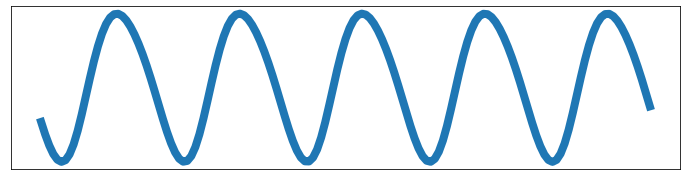

In [7]:
fig = plt.figure(figsize=(12, 3))
plt.plot(reduced_data[100:110, 70:80, :].mean(0).mean(0), linewidth=8.0)
plt.xticks([], [])
plt.yticks([], [])

In [8]:
# fig = plt.figure(figsize=(12, 8))
# plt.axis('off')
# ax = fig.gca()
# img = ax.imshow(imgs[150].T, cmap='hot')

## Part II

<font color='red'>Attention: use seq_generations.ipynb to train differen architectures and generate target sequences before running part II. The code below requires numpy files Fluid_{model}_pred.npy. </font>

### coupled NNs

1.2301694688912983e-07


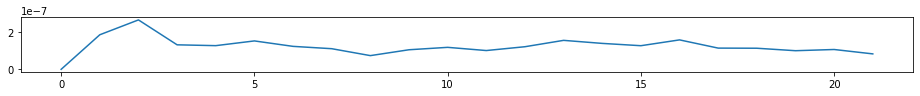

In [9]:
# coupled NN reconstruction
coupled_nn_V = np.load(os.path.join(result_dir, 'fluid_couple_pred.npy'))
coupled_nn_data = U[:, :22].dot(np.diag(s[:22]).dot(coupled_nn_V.T)).reshape(449, 199, -1)
print(((coupled_nn_V - VT[:22, :].T)**2).mean())
plt.figure(figsize = (16, 1))
plt.plot(((coupled_nn_V - VT[:22, :].T)**2).mean(0))

In [10]:
# animation of reconstruction via coupled NNs
imgs = [coupled_nn_data[:, :, i] for i in range(151)]
coupled_anim = plot_images(imgs)
coupled_anim.save(os.path.join(result_dir, 'fluid_HiTS_pred.mp4'))
HTML(coupled_anim.to_html5_video())

([], [])

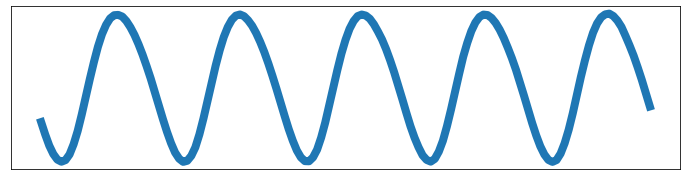

In [11]:
fig = plt.figure(figsize=(12, 3))
plt.plot(coupled_nn_data[100:110, 70:80, :].mean(0).mean(0), linewidth=8.0)
plt.xticks([], [])
plt.yticks([], [])

In [12]:
# fig = plt.figure(figsize=(12, 8))
# plt.axis('off')
# ax = fig.gca()
# img = ax.imshow(imgs[150].T, cmap='hot')

### lstm

9.201967227786053e-08


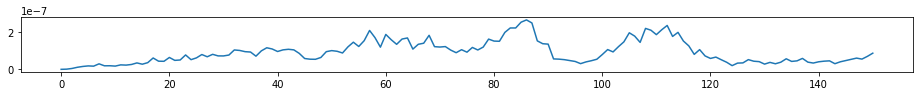

In [13]:
# lstm reconstruction
lstm_V = np.load(os.path.join(result_dir, 'fluid_lstm_pred.npy'))
lstm_data = U[:, :22].dot(np.diag(s[:22]).dot(lstm_V.T)).reshape(449, 199, -1)
print(((lstm_V - VT[:22, :].T)**2).mean())
plt.figure(figsize = (16, 1))
plt.plot(((lstm_V - VT[:22, :].T)**2).mean(1))

In [14]:
# animation of reconstruction via coupled NNs
imgs = [lstm_data[:, :, i] for i in range(151)]
lstm_anim = plot_images(imgs)
lstm_anim.save(os.path.join(result_dir, 'fluid_LSTM_pred.mp4'))
HTML(lstm_anim.to_html5_video())

([], [])

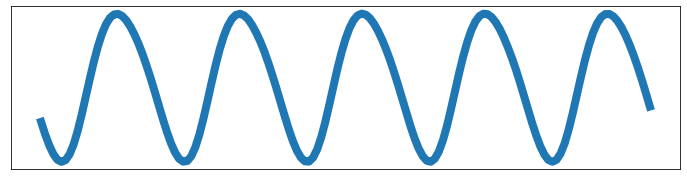

In [15]:
fig = plt.figure(figsize=(12, 3))
plt.plot(lstm_data[100:110, 70:80, :].mean(0).mean(0), linewidth=8.0)
plt.xticks([], [])
plt.yticks([], [])

In [16]:
# fig = plt.figure(figsize=(12, 8))
# plt.axis('off')
# ax = fig.gca()
# img = ax.imshow(imgs[150].T, cmap='hot')

### reservoir

2.2224860898902787e-08


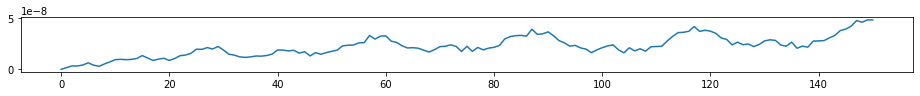

In [17]:
# lstm reconstruction
reservoir_V = np.load(os.path.join(result_dir, 'fluid_reservoir_pred.npy'))
reservoir_data = U[:, :22].dot(np.diag(s[:22]).dot(reservoir_V.T)).reshape(449, 199, -1)
print(((reservoir_V - VT[:22, :].T)**2).mean())
plt.figure(figsize = (16, 1))
plt.plot(((reservoir_V - VT[:22, :].T)**2).mean(1))

In [18]:
# animation of reconstruction via coupled NNs
imgs = [reservoir_data[:, :, i] for i in range(151)]
reservoir_anim = plot_images(imgs)
reservoir_anim.save(os.path.join(result_dir, 'fluid_Reservoir_pred.mp4'))
HTML(reservoir_anim.to_html5_video())

([], [])

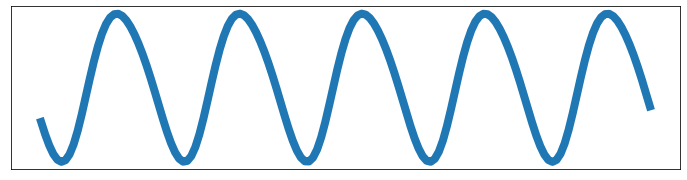

In [19]:
fig = plt.figure(figsize=(12, 3))
plt.plot(reservoir_data[100:110, 70:80, :].mean(0).mean(0), linewidth=8.0)
plt.xticks([], [])
plt.yticks([], [])

In [20]:
# fig = plt.figure(figsize=(12, 8))
# plt.axis('off')
# ax = fig.gca()
# img = ax.imshow(imgs[150].T, cmap='hot')

### cwrnn

6.79443128308246e-07


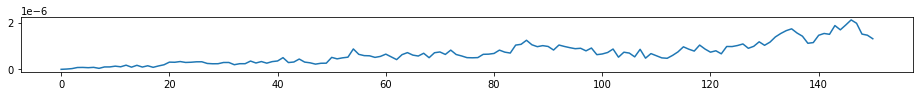

In [21]:
# lstm reconstruction
cwrnn_V = np.load(os.path.join(result_dir, 'fluid_cwrnn_pred.npy'))
cwrnn_data = U[:, :22].dot(np.diag(s[:22]).dot(cwrnn_V.T)).reshape(449, 199, -1)
print(((cwrnn_V - VT[:22, :].T)**2).mean())
plt.figure(figsize = (16, 1))
plt.plot(((cwrnn_V - VT[:22, :].T)**2).mean(1))

In [22]:
# animation of reconstruction via coupled NNs
imgs = [cwrnn_data[:, :, i] for i in range(151)]
cwrnn_anim = plot_images(imgs)
cwrnn_anim.save(os.path.join(result_dir, 'fluid_CWRNN_pred.mp4'))
HTML(cwrnn_anim.to_html5_video())

([], [])

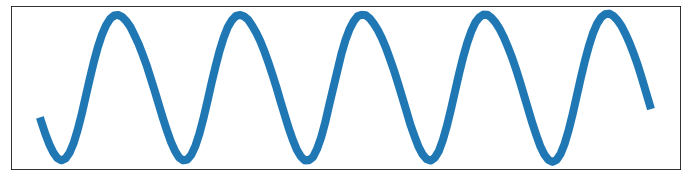

In [23]:
fig = plt.figure(figsize=(12, 3))
plt.plot(cwrnn_data[100:110, 70:80, :].mean(0).mean(0), linewidth=8.0)
plt.xticks([], [])
plt.yticks([], [])

In [24]:
# fig = plt.figure(figsize=(12, 8))
# plt.axis('off')
# ax = fig.gca()
# img = ax.imshow(imgs[150].T, cmap='hot')